### Base Model (Trained on SQuAD) Evaluation Metrics

#### F1

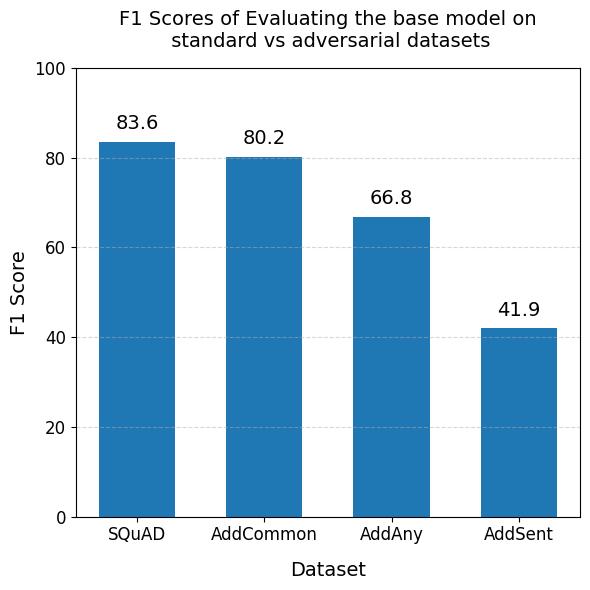

In [4]:
import json

import matplotlib.pyplot as plt

# Load F1 scores from eval_metric.json files
def load_f1_score(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return data['eval_f1']

# File paths
squad_file = './eval_output/eval_metrics.json'
addsent_file = './adv_addSent/eval_output/eval_metrics.json'
addany_file = './adv_addAny/eval_output/eval_metrics.json'
addcommon_file = './adv_addCommon/eval_output/eval_metrics.json'

# Load F1 scores
f1_squad = load_f1_score(squad_file)
f1_addsent = load_f1_score(addsent_file)
f1_addany = load_f1_score(addany_file)
f1_addcommon = load_f1_score(addcommon_file)

# Data for plotting
datasets = ['SQuAD', 'AddCommon', 'AddAny', 'AddSent']
f1_scores = [f1_squad, f1_addcommon, f1_addany, f1_addsent]

# Create bar graph
plt.figure(figsize=(6, 6))
bars = plt.bar(datasets, f1_scores, width=0.6)
plt.xlabel('Dataset', fontsize=14, labelpad=12)
plt.ylabel('F1 Score', fontsize=14)
plt.title('F1 Scores of Evaluating the base model on\n standard vs adversarial datasets', fontsize=14, pad=15)

# Add F1 score labels on top of the bars
for bar, score in zip(bars, f1_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{score:.1f}', ha='center', va='bottom', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 100)  # Adjust the y-axis limit if needed
plt.tight_layout()
plt.show()

#### BLEU (n-gram precisions) evaluated across the datasets

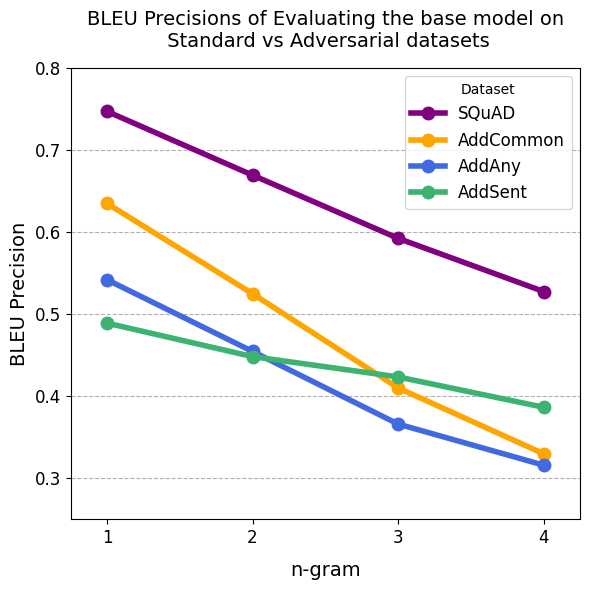

In [5]:
# Load BLEU precision values from eval_metric.json files
def load_bleu_precision(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return data['eval_bleu']['precisions']

# Load BLEU precision values
bleu_squad = load_bleu_precision(squad_file)
bleu_addsent = load_bleu_precision(addsent_file)
bleu_addany = load_bleu_precision(addany_file)
bleu_addcommon = load_bleu_precision(addcommon_file)

# Data for plotting
bleu_precisions = [bleu_squad, bleu_addcommon, bleu_addany, bleu_addsent]
n_grams = [1, 2, 3, 4]

# Create line chart
plt.figure(figsize=(6, 6))
colors = ['purple', 'orange', 'royalblue', 'mediumseagreen']  # Define colors for each dataset
labels = ['SQuAD', 'AddCommon', 'AddAny', 'AddSent']
for dataset, precisions, color, label in zip(datasets, bleu_precisions, colors, labels):
    plt.plot(n_grams, precisions, marker='o', linestyle='-', markersize=9, linewidth=4, label=label, color=color)

plt.xlabel('n-gram', fontsize=14, labelpad=10)
plt.ylabel('BLEU Precision', fontsize=14)
plt.title('BLEU Precisions of Evaluating the base model on\n Standard vs Adversarial datasets', fontsize=14, pad=15)

plt.xticks(n_grams, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.ylim(0.25, 0.8)  # Adjust the y-axis limit if needed
plt.xlim(0.75, 4.25)  # Adjust the x-axis limit if needed
plt.tight_layout()
plt.show()

In [11]:
# Load BLEU precision values from eval_metric.json files
def print_bleu(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        print(file_path.split("/")[1] + ": " + str(round(data['eval_bleu']['bleu'], 2)))

# Print BLEU scores
print_bleu(squad_file)
print_bleu(addsent_file)
print_bleu(addany_file)
print_bleu(addcommon_file)

eval_output: 0.63
adv_addSent: 0.44
adv_addAny: 0.41
adv_addCommon: 0.46
